# Statically Balanced Walking Gaits

In this class, we will analyze statically balanced walking gaits for humanoid robots.

Firstly, we will use the following simple model of a humanoid robot with two legs and one torso.

In [12]:
from IPython.core.display import display, HTML
display( HTML('<h2>Humanoid Robot Model</h2>') )


LFoot = 0.3
LCalf = 0.5
LThigh = 0.4
LTorso = 0.6

MFoot = 0.25
MCalf = 0.5
MThigh = 0.4
MTorso = 1.0

Links= [ ( "Foot", LFoot, MFoot, ( - LFoot / 2, 0 ) ), 
         ( "Calf", LCalf, MCalf, ( 0, 0 ) ), 
         ( "Thigh", LThigh, MThigh, ( 0, 0 ) ),
         ( "Torso", LTorso, MTorso, ( 0, 0 ) ) ]

FOOT, CALF, THIGH, TORSO = 0, 1, 2, 3
NAME, LENGTH, MASS, OFFSET = 0, 1, 2, 3

def renderTable( links ):
    s = '<table style="text-align:center;">'
    s += "<tr>"
    s += "<td> Name </td>"
    s += "<td> Length (m) </td>"
    s += "<td> Mass (kg) </td>"
    s += "</tr>"
    
    for l in links:
        name, length, mass, off = l
        s += "<tr>"
        s += "<tr> <td> {0} </td> <td>  {1:5.2f} </td> <td>  {2:5.2f} </td> </tr>".format( name, length, mass )
    
    s += "</table>"
    return s
    
display( HTML( '<p>We use a simple model of a humanoid robot with the following parameters.') )
display( HTML( renderTable( Links ) ) )

Name,Length (m),Mass (kg)
Foot,0.30,0.25
Calf,0.50,0.50
Thigh,0.40,0.40
Torso,0.60,1.00


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [14]:
def rotateZ( theta ):
    rz = np.array( [ [ math.cos( theta ), - math.sin( theta ), 0, 0 ],
                           [ math.sin( theta ), math.cos( theta ), 0, 0 ],
                           [ 0, 0, 1, 0 ],
                           [ 0, 0, 0, 1 ] ] )
    return rz

def rotateY( theta ):
    ry = np.array( [ [ math.cos( theta ), 0, math.sin( theta ), 0 ],
                           [ 0, 1, 0, 0 ],
                           [ - math.sin( theta ), 0, math.cos( theta ), 0 ],
                           [ 0, 0, 0, 1 ] ] )
    return ry

def rotateX( theta ):
    rx = np.array( [ [ 1, 0, 0, 0 ],
                           [ 0, math.cos( theta ), - math.sin( theta ), 0 ],
                           [ 0, math.sin( theta ), math.cos( theta ), 0 ],
                           [ 0, 0, 0, 1 ] ] )
    return rx

def translate( dx, dy, dz ):
    t = np.array( [ [ 1, 0, 0, dx ],
                          [ 0, 1, 0, dy ],
                          [ 0, 0, 1, dz ],
                          [ 0, 0, 0, 1 ] ] )
    return t

def DHH( theta, d, a, alpha ):
    return rotateZ( theta ).dot( translate( 0, 0, d) ).dot( translate( a, 0, 0 ) ).dot( rotateX( alpha ) )

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')

In [16]:
def drawRobot( ax, A, state, links ):
    support, left, right = state
    if ( support == 'left'):
        supportLeg = left
        swingLeg = right
    else:
        supportLeg = right
        swingLeg = left
    
    # Draw support leg
    foot = np.array( [ [ 0, 0, 0, 1 ], [ links[FOOT][LENGTH], 0, 0, 1 ] ] ).T
    ax.plot( A.dot( foot )[0,:], A.dot( foot )[1,:], 'b-', linewidth = 5 )
    f = foot[:,1] + np.array( [ links[FOOT][OFFSET][0], links[FOOT][OFFSET][1], 0, 1 ] ).T
    print(f)
    ax.scatter( A.dot( f )[0], 
                A.dot( f )[1], 75, color='k' )
    
    leg = supportLeg
    cx, cy, cangle = links[FOOT][LENGTH] / 2, 0, 0.0
    for i in range( len( links[1:]) ): 
        dx = cx + math.cos( cangle + leg[i] ) * links[i+1][LENGTH]
        dy = cy + math.sin( cangle + leg[i] ) * links[i+1][LENGTH]
        ax.plot( [ cx, dx ], [ cy, dy ], 'b-', linewidth=5 )
        cx, cy, cangle = dx, dy, cangle + leg[i]

    # Draw swing leg
    cx = cx + math.cos( cangle + math.pi ) * links[len(links) - 1 ][ LENGTH ] 
    cy = cy + math.sin( cangle + math.pi ) * links[len(links) - 1 ][ LENGTH ]

    leg = swingLeg
    for i in range( len(links) - 2, 0, -1 ):
        dx = cx - math.cos( cangle - leg[i] ) * links[i][LENGTH]
        dy = cy - math.sin( cangle - leg[i] ) * links[i][LENGTH]
        ax.plot( [ cx, dx ], [ cy, dy ], 'g-', linewidth=5 )
        cx, cy, cangle = dx, dy, cangle - leg[i]
        
    ax.plot( [ cx + math.cos(cangle - leg[0]) * links[FOOT][LENGTH] / 2, cx + math.cos(cangle + math.pi - leg[0]) * links[FOOT][LENGTH] / 2 ],
             [ cy + math.sin(cangle - leg[0]) * links[FOOT][LENGTH] / 2, cy + math.sin(cangle + math.pi - leg[0]) * links[FOOT][LENGTH] / 2 ],
            'g-', linewidth=5)

[ 0.15  0.    0.    2.  ]


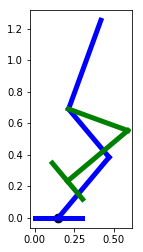

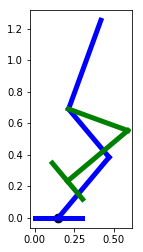

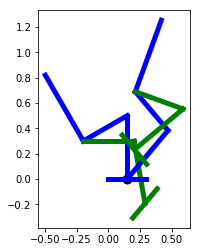

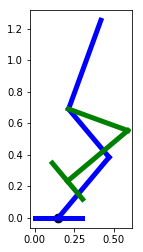

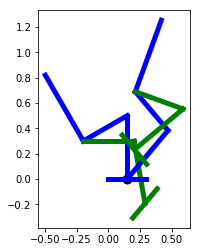

In [19]:
drawRobot( ax, np.eye(4), [ 'left', 
                           [ 50.0/180.0 *math.pi, 80.0/180.0 * math.pi, -60.0/180.0 * math.pi], 
                           [ 90.0/180.0 *math.pi, 120.0/180.0 * math.pi, -90.0/180.0 * math.pi] ], Links )
plt.show()

In [18]:
fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.set_aspect('equal')

drawRobot( ax, np.eye(4), [ 'right', 
                           [ 50.0/180.0 *math.pi, 80.0/180.0 * math.pi, -60.0/180.0 * math.pi], 
                           [ 90.0/180.0 *math.pi, 120.0/180.0 * math.pi, -90.0/180.0 * math.pi] ], Links )

[ 0.15  0.    0.    2.  ]
